# Numerical Integration
## Integration

- The integral of a function $f(x)$ is evaluated using the fundamental theorem of calculus:

$$ \int\limits_a^b f(x)dx = F(b) - F(a) $$

- Here, $F(x)$ is the anti-derivative of $f(x)$

$$\frac{dF(x)}{dx} = f(x) $$

- Functions for which exact integrals can be computed

$$\begin{aligned}
&\begin{array}{c|c}
\hline \hline f(x) & F(x)\\
\hline x^n (n\neq -1) & \frac{x^{n+1}}{n+1}  \\
1/x & ln(x)  \\
e^x & e^x  \\
sin(x) & -cos(x) \\
\hline
\end{array}
\end{aligned}$$



- Functions for which exact integrals *cannot* be computed

$$\begin{aligned}
&\begin{array}{c|c}
\hline e^{-x^2} & ?  \\
x^x & ?  \\
\hline
\end{array}
\end{aligned}$$

## Numerical Integration

- An intuitive understanding of an integral is:

$$
    \int\limits_a^b f(x) dx = \text{net area under the curve} f(x)
$$

- Numerical integration methods approximate the area under the curve using simple geometrical shapes to evaluate definite integrals

<img src="../images/integral.png" width=90% class="center">

- An integral can be approximed by summing the areas of a finite number of subdivisions

- Numerical integration methods that use *fixed samples* of a function:
    - Reimann sums
    - Trapezoid rule
    - Simpson's rule

- These methods do not require the exact function definition 
    - Useful for experimental data

- Mathematically, these numercial methods divide the integration domain into sub-domains

- The integral is then split into sum of integrals over each sub-domain

$$
\begin{align*}
\int\limits_a^b f(x) dx &= \sum_{i=0}^{n-1} \int\limits_{x_i}^{x_{i+1}} f(x) dx \\
                        &= \int\limits_{x_0 = a}^{x_{1}} f(x) dx + \int\limits_{x_1}^{x_{2}} f(x) dx + \cdots + \int\limits_{x_i}^{x_{i+1}} f(x) dx + \cdots + \int\limits_{x_{n-1}}^{x_{n}=b} f(x) dx
\end{align*}
$$

- Now, the Taylor series approximation of a function around $x=x_p$

$$
f(x) = f(x_p) + f^{(1)}(x_p) (x-x_p) + f^{(2)}(x_p) \frac{(x-x_p)^2}{2!} + \cdots
$$

- Substituting this into one of the integral ($x_i \le x_p \le x_{i+1}$):

$$
\int\limits_{x_i}^{x_{i+1}} f(x) dx = \int\limits_{x_i}^{x_{i+1}} \left(f(x_p) + f^{(1)}(x_p) (x-x_p) + f^{(2)}(x_p) \frac{(x-x_p)^2}{2!} + \cdots \right) dx
$$

- Integrating, we get ($h = x_{i+1} - x_i$):

$$
\int\limits_{x_i}^{x_{i+1}} f(x) dx = h f(x_p) + \frac{h}{2} (x_i + x_{i+1} - 2 x_p) f^{(1)}(x_p) + O(h^3) 
$$

### Riemann Sums

- Riemann sums approximate the integrals using just the 1st term of the Taylor series

$$
\int\limits_{x_i}^{x_{i+1}} f(x) dx \approx h f(x_p)
$$

- In other words, Riemann sums assume the function is constant within a subdivision
    - The subdivision is rectangular in shape

![Riemann sum](../images/riemann_sum.png)

- Sum over the curve from $a$ to $b$ to approximate the definite integral

$$  \int_a^b f(x)  \approx \sum A_i  $$

- For left Riemann sum:

$$  A_i = h f(x_i) $$

- Uses the left-most point of sub-domain $x_i$ to compute the height of the rectangle

- Right Riemann sum - uses the right-most point $x_{i+1}$ to compute the height of the rectangle

$$  A_i = h f(x_{i+1}) $$

<img src="../images/rright.png" width=40% class="center">

- Midpoint Riemann sum - use the mid-point or equivalently, the average of the left and right points

$$ A_i = h f\left(\frac{x_i + x_{i+1}}{2}\right)  $$

<img src="../images/rmid.png" width=40% class="center">

### Trapezoid Rule

- The trapezoid rule assumes that the function is linear within the sub-domain
    - The shape of the area under this linear approximation forms a trapezoid, hence the name

<img src="../images/trapz.png" width=76% class="center">

- The area for each subdivision is:

$$  A_i = \frac{h}{2}\Bigl( f(x_i)  + f(x_{i+1}) \Bigr) $$

- Trapezoidal integration is effectively the average of left and right Riemann sums

### Simpson's Rule

- Simpson's rule uses a quadratic function to approximatge the function within a sub-domain consisting of 3 points

<img src="../images/simpsons.png" width=76% class="center">

<img src="../images/simpsons_gif.gif" width=75% class="center">

<p style="text-align:center">Source: https://en.wikipedia.org/wiki/Simpson%27s_rule</p>

- According to Simpson's rule:

$$ A_i =  \frac{h}{3}\Bigl(  f(x_{i}) +4f(x_{i+1/2}) + f(x_{i+1)} \Bigr)  $$

### Practical Considerations

- The error associated with:
    - left and right Reimann sums is $O(h)$
    - midpoint Reimann sums and trapezoidal rule is  $O(h^2)$
    - Simpson's rule is $O(h^4)$

- Often, numerical integration is occuring on sampled experimental data
    - Thus, the step size is often controlled by the experimental conditions
    - Use of trapezoidal integration or Simpson's rule is encouraged to reduce numerical errors

- While the error associated with Simpson's rule is small, it sometimes gives poor results with highly oscillatory functions

### Interactive Demonstration

In [1]:

%matplotlib widget

import numpy as np
from scipy import integrate, interpolate
import matplotlib.pyplot as plt

from ipywidgets import HBox, VBox, interactive, RadioButtons
from IPython.display import display


In [2]:
def numerical_int(f, a, b, N, method='Riemann'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].

    Parameters
    ----------
    f : function -- Vectorized function of one variable
    a , b : float -- Endpoints of the interval [a,b]
    N : int -- Number of subintervals of equal length in the partition of [a,b]
    method : str -- Integration method; valid values 'Riemann', 'Trapezoid' or 'Simpsons'
        
    Returns
    -------
    float -- Approximation of the integral
    '''
    h = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'Riemann':
        x_mid = (x[:-1] + x[1:])/2
        return h*np.sum(f(x_mid))
    elif method == 'Trapezoid':
        return 0.5*h*np.sum(f(x[:-1]) + f(x[1:]))
    elif method == 'Simpsons':
        return (h/3)*np.sum(f(x[0:-1:2]) + 4*f(x[1::2]) + f(x[2::2]))
    else:
        raise ValueError("Method must be 'Riemann', 'Trapezoid' or 'Simpsons'.")

In [3]:
# Formatting stuff
fs = 20
ls = 20
lw = 2
ms = 10

# x values - global scope
x = np.linspace(-4, 4, 100)

# Radio button for choosing the function
funcButton = RadioButtons(options=['Quadratic'], 
                       value='Quadratic', 
                       layout={'width': 'max-content'}, # If the items' names are long
                       description='Integrand', disabled=False)

fig, ax = plt.subplots(figsize=(10, 10))

# Interactive plot function callback
def plot_func(IntMeth, Function, N=2):
    # Clear figure
    ax.clear()

    # Set function
    f = None
    fIntExact = None
    titleText = None
    if Function == 'Quadratic':
        f = lambda x: 5 - 0.25*x**2
        fIntExact = 56/3
        titleText = r"$(5 - 0.25x^2)$"
    elif Function == 'Cubic':
        f = lambda x: 5 - 0.1*x**3
        fIntExact = 20
        titleText = r"$(5 - 0.1x^3)$"
    elif Function == 'Quartic':
        f = lambda x: 5 - 0.025*x**4
        fIntExact = 19.68
        titleText = r"$(5 - 0.025x^4)$"
    elif Function == 'Exponential':
        f = lambda x: np.exp(0.1*x)
        fIntExact = 20*np.sinh(0.2)
        titleText = r"$e^{0.1x}$"
    elif Function == 'Cos':
        f = lambda x: np.cos(1.4*np.pi*x)
        fIntExact = np.sin(2.8*np.pi)/0.7/np.pi
        titleText = r"$cos(1.4 \pi x)$"

    # Integration bounds
    a = -2
    b = 2

    # Numerical integrated value
    fInt = numerical_int(f, a, b, N, IntMeth)
    err = (fInt/fIntExact - 1)*100
    ax.set_title(r"$\int_a^b $" + titleText + r"$ dx \approx $" + f"{fInt:4.4f}\nError = {err:4.2f}%\n", fontsize=fs)

    # Line plot of the function
    ax.plot(x, f(x), 'black', lw=lw)
    ax.set_xlabel('$\it{x}$', fontsize=fs)
    ax.set_ylabel('$f(x)$', fontsize=fs)
    #ax.set_xlim(0,6)
    #ax.set_ylim(-1, 110)
    ax.tick_params(axis='both', labelsize=ls)

    # Geometry used for integration
    xSam = np.linspace(-2, 2, N+1)
    if IntMeth == 'Riemann':
        x_mid = (xSam[:-1] + xSam[1:])/2 # Midpoints
        y_mid = f(x_mid)
        ax.plot(x_mid, y_mid, 'b.', markersize=ms)
        ax.bar(x_mid, y_mid, width=4/N, alpha=0.2, edgecolor='b', color='tab:blue')
    elif IntMeth == 'Trapezoid':
        for i in range(N):
            x0 = xSam[i]
            x1 = xSam[i + 1]
            ax.plot(xSam, f(xSam), 'b.', markersize=ms)
            ax.fill_between([x0, x1],[f(x0), f(x1)], color='tab:blue', alpha=0.2, edgecolor='b')
    else:
        for i in range(N//2):
            x0 = xSam[2*i]
            x1 = xSam[2*i + 2]
            xm = xSam[2*i + 1]
            [y0, ym, y1] = [f(x0), f(xm), f(x1)]
            xp = np.linspace(x0, x1, 20)
            h = xm-x0
            yp = (y0/(2*h**2))*(xp-xm)*(xp-x1) \
               - (ym/(  h**2))*(xp-x0)*(xp-x1) \
               + (y1/(2*h**2))*(xp-xm)*(xp-x0)
            ax.plot(xSam, f(xSam), 'b.', markersize=ms)
            ax.fill_between(xp, yp, color='tab:blue', alpha=0.2, edgecolor='b')

    fig.canvas.draw_idle()
    #fig.canvas.flush_events()
    plt.show()

interactive_plot = interactive(plot_func, N=(2, 16, 2), 
                                          IntMeth=['Riemann', 'Trapezoid', 'Simpsons'],
                                          Function=['Quadratic', 'Cubic', 'Quartic', 'Exponential', 'Cos'])
output = interactive_plot.children[-1]
output.layout.height = '1200px'

#buttons.observe(updateF, names='value')
display(interactive_plot)

interactive(children=(Dropdown(description='IntMeth', options=('Riemann', 'Trapezoid', 'Simpsons'), value='Rie…

### Gauss Integration

- Provides numerical integration rules specialized for polynomials

- Also known as Gausian quadrature
    - $w_{in} = $ integration weights
    - $\zeta_{in} = $ integration points
    - $n = $ number of Gauss integration points $(\geq 1)$

$$ \int\limits_{-1}^1 f(\zeta)d\zeta \approx \sum_{i=1}^2 w_{in}f(\zeta_{in}) $$

- It can be shown that with $n$ integration points, choosing the integration points to be the roots of the degree-$n$ _Legendre polynomial_, $P_n(x)$ gives exact results for polynomials of order $2n-1$ (Gauss-Legendre quadrature)

## Integrating with `scipy.integrate`

- The `integrate` sub-module of scipy provides various functions for numerical integration
    - Integration using samples
        - `trapezoid` - same as `trapz` from numpy
        - `simpson`
        - `cumulative_trapezoid` - returns a numpy array with integral evaluated as a function of x
    - Integration when a function object is available
        - `fixed_quad` - integration using Gaussian quadrature
        - `quad` - integration using adaptinve quadrature methods
        - `dblquad`, `tplquad` - double and triple integration
        - `nquad` - higher order integration with arbitrary number of variables
 

- Example: evaluate $ \int\limits_o^\pi sin(x) dx $

In [4]:

from scipy import integrate

# 20 samples of sin(x)
x = np.linspace(0, np.pi, 20)
y = np.sin(x)


In [5]:

# Exact solution 
int_exact = -np.cos(np.pi) + np.cos(0)


In [ ]:

# numerical integration
int_t = integrate.trapezoid(y, x)
int_s = integrate.simpson(y, x)

print(f'{"Exact: ":>16}{int_exact}\n{"Trapezoid Rule: ":>16}{int_t}\n{"Simpson`s Rule: ":>16}{int_s}')


- If $f(x)$ is the input, then `cumulative_trapezoid` function computes samples of the integrated function 

$$g(x) = \int\limits_a^x f(x) dx$$

- Example: 

$$f(x) = sin(x)$$
$$\Rightarrow g(x) = cos(a) - cos(x)$$

In [24]:

x = np.linspace(0, np.pi, 20)
y = np.sin(x)

# Cumulative integration with initial value (a) = 0
y_int = integrate.cumulative_trapezoid(y, x, initial=0)


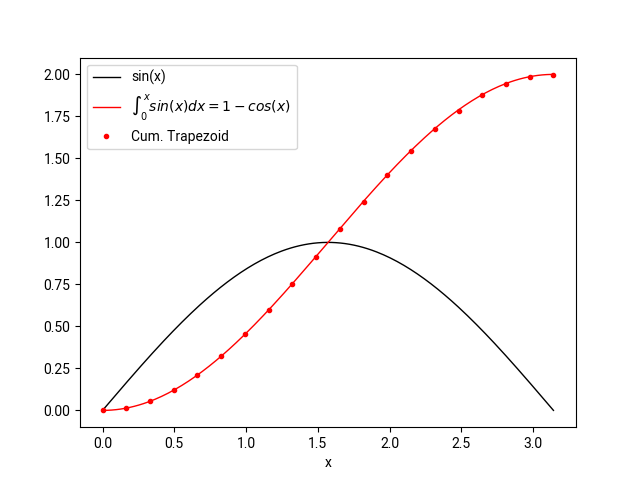

In [26]:

# For plotting exact value
x_e = np.linspace(0, np.pi, 200)
y_e = np.sin(x_e)
y_int_e = 1 - np.cos(x_e)

# Plot
fig, ax = plt.subplots()
ax.plot(x_e, y_e, '-k', label='sin(x)')
ax.plot(x_e, y_int_e, '-r', label='$\int_0^x sin(x)dx = 1-cos(x)$')
ax.plot(x, y_int,'or', markersize=3, label='Cum. Trapezoid')
ax.set_xlabel('x')
ax.legend();


## Scipy Integration

- Integration given function objects
    - `quad`, `fixed_quad`, `dblquad`, `tplquad`, `nquad`

- Example: evaluate $\int\limits_0^{\pi} sin(x) dx$
    - The exact value is 2

In [28]:

def f(x):
    return np.sin(x)

integrate.fixed_quad(f, 0, np.pi, n=5)


(2.0000001102844727, None)

- The first value in the output `tuple` is the integral
- The second value is alway `None`

In [31]:
# Adaptive Gauss-Kronrod quadrature
integrate.quad(f, 0, np.pi)

(2.0, 2.220446049250313e-14)

- The first value in the output `tuple` is the integral
- The second value is the estimated error

- Example: evaluate $\int\limits_0^\infty e^{-x^2} dx$

- Mathemeticians have defined a special function called the error function because this integral appear fairly commonly:

$$ erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-x^2} dx$$

In [32]:

def f(x):
    return np.exp(-x**2)

# Using Gauss quadrature
val = integrate.quad(f, 0, np.inf)
print(val[0])

0.8862269254527579


In [33]:

from scipy.special import erf

# using the error function
val2 = np.sqrt(np.pi)/2*erf(np.inf)
print(val2)


0.8862269254527579


## Reference Material

- https://pythonnumericalmethods.berkeley.edu/notebooks/chapter21.00-Numerical-Integration.html
- Chapter 3, https://hplgit.github.io/prog4comp/index.html